I tried to download the subset which contains 10000songs from Million Song Dataset. This subset is 1.8GB and has lots of files in h5 file format. It is difficult for me to deal with those large amount of files. Then I found this taste profile subset in txt file format on the same website. There are 48,373,586 user-song-play count triplets in this dataset. I think this dataset is pretty good for the simple reccommendation engine practice.

In [ ]:
import pandas as pd
from sklearn.metrics.pairwise import euclidean_distances, cosine_distances

More records will cost more time when making pivot table, so I just grab 40000 rows.

In [ ]:
data = pd.read_csv('train_triplets.txt',sep='\t', nrows=40000, header=None)
data.columns=['user_id','song_id','play_counts']
data.head()

,user_id,song_id,play_counts
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAPDEY12A81C210A9,1
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFNSP12AF72A0E22,1
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFOVM12A58A7D494,1


In [ ]:
print('There are {} users and {} songs'.format(data['user_id'].nunique(),data['song_id'].nunique()))

There are 832 users and 23667 songs


Tried to remove users who only listen once. But the output shows the minimum play counts is 10. So I will keep all the records.

In [ ]:
user_to_remove = data.groupby('user_id')['play_counts'].sum()
user_to_remove.sort_values().head()

user_id
07468cd3a1d3a119f1769eeae2b34aaebc096ec2    10
c52c650431343b7a3f1e7d74cf4e404aa1e63745    10
8247c08db9dba6cc18cff4381c7279e540c374cb    10
e96e052152a7e29bcfd4b841859c66249f280303    10
b4adf5ac8bcba59011df7be840dda1134a47cc30    11
Name: play_counts, dtype: int64

In [ ]:
pivot_data = data.pivot(columns='song_id',index = 'user_id', values='play_counts').fillna(0)
pivot_data.head()

song_id,SOAAAGQ12A8C1420C8,SOAACPJ12A81C21360,SOAACTC12AB0186A20,SOAADCB12A81C22AFA,SOAAEJI12AB0188AB5,SOAAEKX12A6D4F7E4E,SOAAFAC12A67ADF7EB,SOAAFYH12A8C13717A,SOAAIJG12AAA15D821,SOAAKPM12A58A77210,...,SOZZTNF12A8C139916,SOZZUAQ12AC468E289,SOZZVFP12A8C140F14,SOZZVNT12AF729EBC9,SOZZVWB12AB0189C30,SOZZWZV12A67AE140F,SOZZXAO12A58A7D379,SOZZYAO12A6701FF36,SOZZYDA12AB01824FB,SOZZZFB12A8AE45CDC
user_id,,,,,,,,,,,,,,,,,,,,,
0007c0e74728ca9ef0fe4eb7f75732e8026a278b,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0039bd8483d578997718cdc0bf6c7c88b679f488,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0152fcbd02b172a874c75a57a913f0f0109ba272,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01655ae6bc52e29c9cd100a7dde4e9eeae5e4031,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
019d0d1c7a01f8736ba59a124160e5fc70666db7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Use the cosine distance

In [ ]:
dist = pd.DataFrame(cosine_distances(pivot_data.transpose()))
dist = dist.set_index(pivot_data.columns)
dist.columns=pivot_data.columns

<AxesSubplot:>

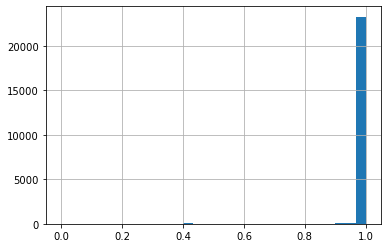

In [ ]:
dist['SOAAFAC12A67ADF7EB'].hist(bins=30)

It seems most of the cosine distances are 1. Let's narrow the range.

<AxesSubplot:>

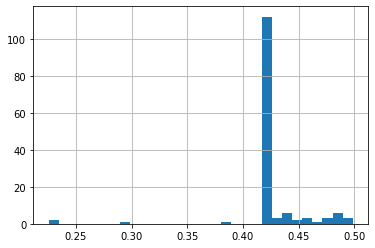

In [ ]:
dist['SOAAFAC12A67ADF7EB'][(dist['SOAAFAC12A67ADF7EB']>0) & (dist['SOAAFAC12A67ADF7EB']<0.5)].hist(bins=30)

In [ ]:
dist['SOAAFAC12A67ADF7EB'].sort_values()[:10]

song_id
SOAAFAC12A67ADF7EB    0.000000
SOBFONC12A8C140932    0.225403
SODLCIU12A8AE45F1D    0.230200
SOMYZVY12A8AE483C4    0.292893
SOKEUYU12A67ADF7E6    0.387628
SOKTIQH12AB01853A5    0.422650
SOTWEPX12A67ADF6BF    0.422650
SOCGPBQ12AB01853A0    0.422650
SOATLAK12A8C13F422    0.422650
SOBWFXM12AB0182808    0.422650
Name: SOAAFAC12A67ADF7EB, dtype: float64

Wrap the code as a function

In [ ]:
def song_reccomend(song_name,k):
    a = dist[song_name].sort_values()[:(k+1)].index.to_list()
    a.remove(song_name)
    
    print('Acoording to {}, the first {} songs recommended to you are:\n {}'.format(song_name,k,a))


In [ ]:
song_reccomend('SOAAFAC12A67ADF7EB',10)

Acoording to SOAAFAC12A67ADF7EB, the first 10 songs recommended to you are:
 ['SOBFONC12A8C140932', 'SODLCIU12A8AE45F1D', 'SOMYZVY12A8AE483C4', 'SOKEUYU12A67ADF7E6', 'SOKTIQH12AB01853A5', 'SOTWEPX12A67ADF6BF', 'SOCGPBQ12AB01853A0', 'SOATLAK12A8C13F422', 'SOBWFXM12AB0182808', 'SOFSRML12A670215B2']


## Use the Euclidean distance

In [ ]:
dist_euc = pd.DataFrame(euclidean_distances(pivot_data.transpose()))
dist_euc = dist_euc.set_index(pivot_data.columns)
dist_euc.columns=pivot_data.columns

In [ ]:
dist_euc['SOAAFAC12A67ADF7EB'].sort_values()[:10]